This notebook tests the Keras model trained for classifying floor button numbers

In [1]:
from src.object_detection.inference.ClassifierKeras import ClassifierKeras
from keras_preprocessing.image.utils import load_img, img_to_array
import os

In [2]:
MODEL_DIR_PATH = r"C:\Users\cernil\Documents\test_floor_classification_model"
LABEL_MAP_DIR = None
TEST_IMAGE_FOLDER_DIR_PATH = r"C:\Users\cernil\Documents\test_floor_classification_data"

In [8]:
classifier = ClassifierKeras(MODEL_DIR_PATH)
target_size = (224, 224)

In [9]:
images_to_test = []
for entry in os.listdir(TEST_IMAGE_FOLDER_DIR_PATH):
    image = load_img(TEST_IMAGE_FOLDER_DIR_PATH+os.sep+entry, target_size=target_size)
    images_to_test.append(img_to_array(image))

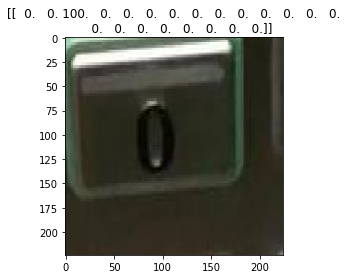

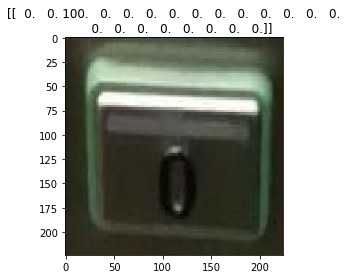

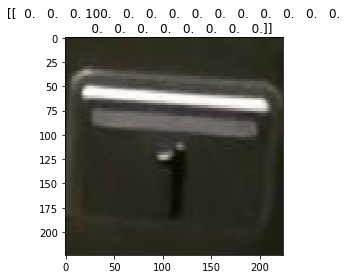

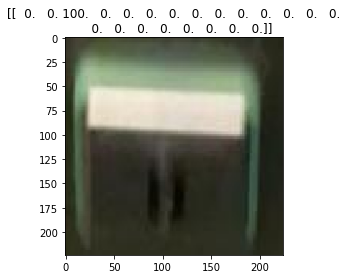

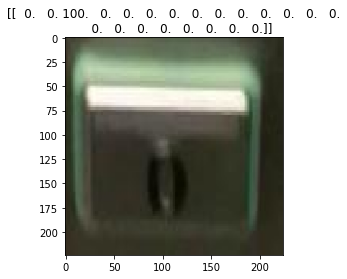

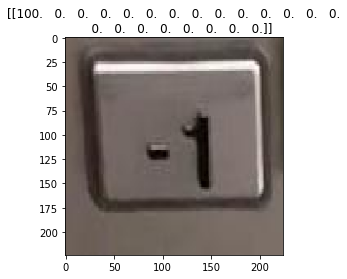

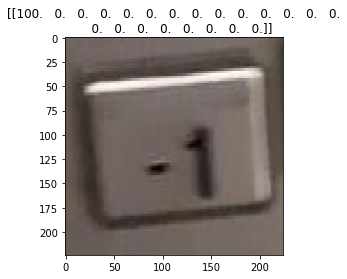

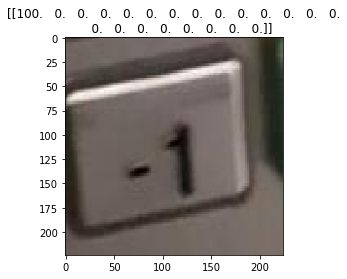

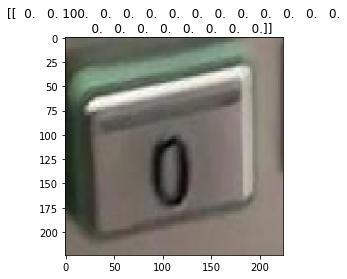

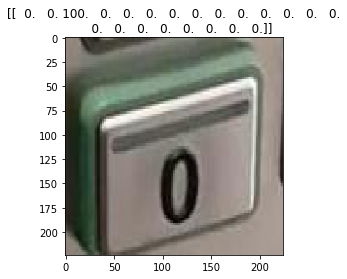

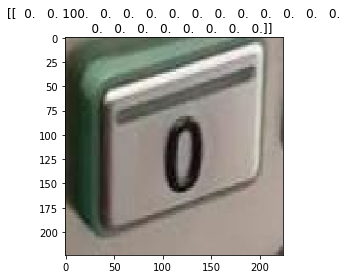

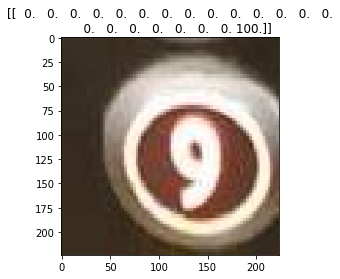

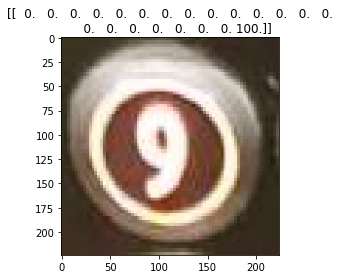

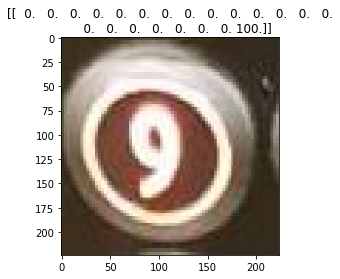

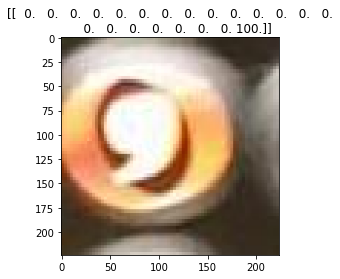

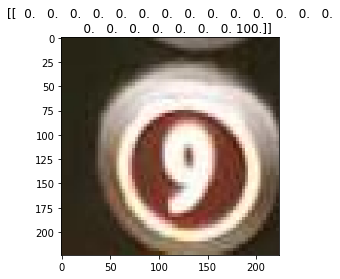

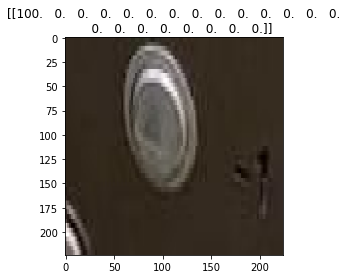

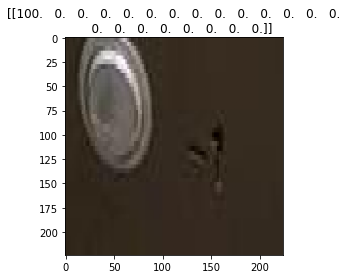

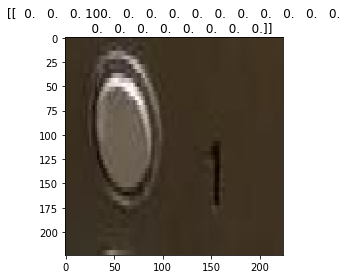

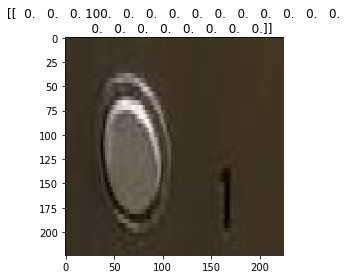

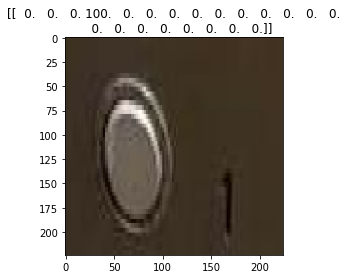

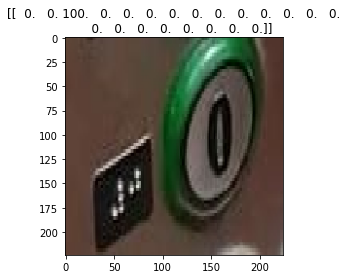

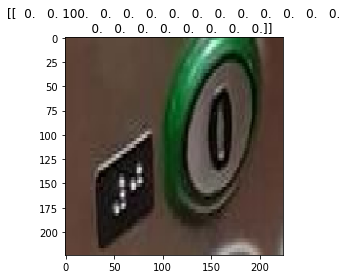

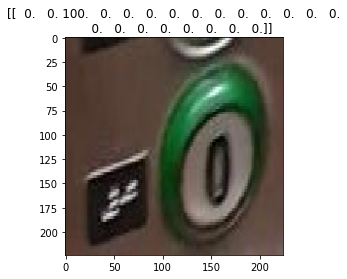

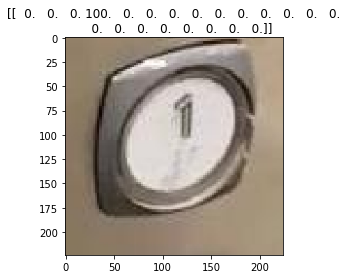

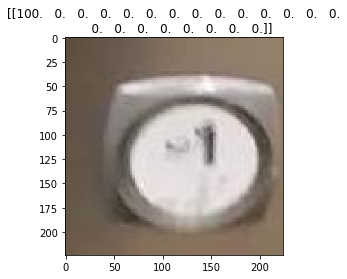

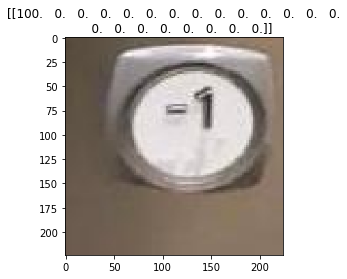

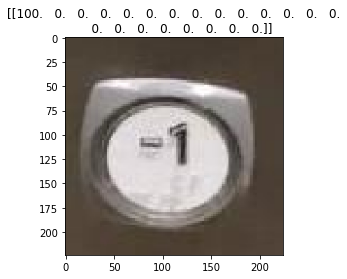

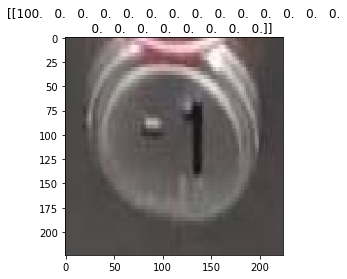

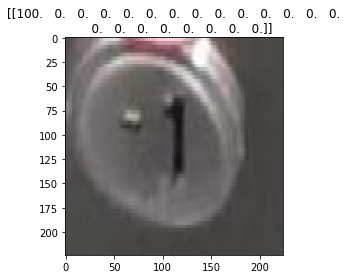

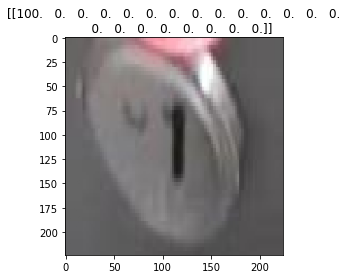

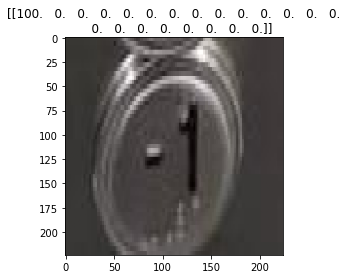

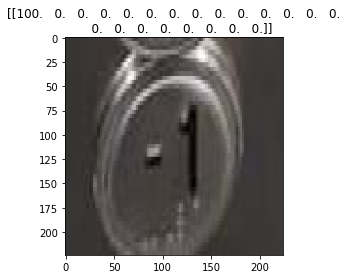

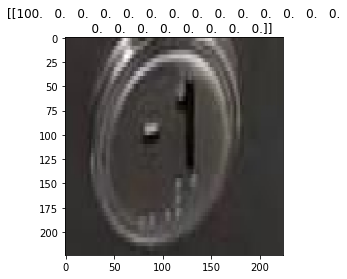

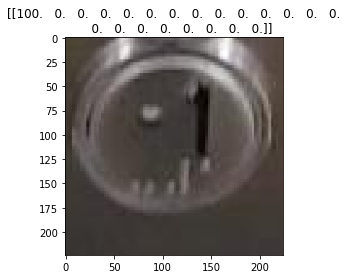

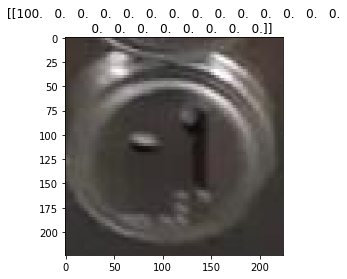

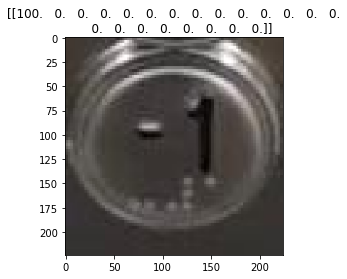

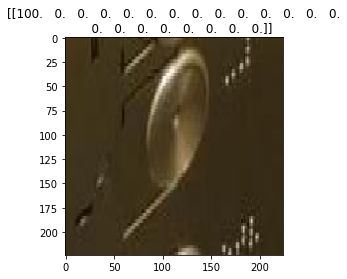

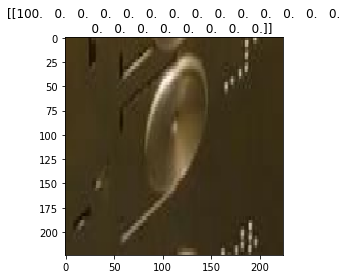

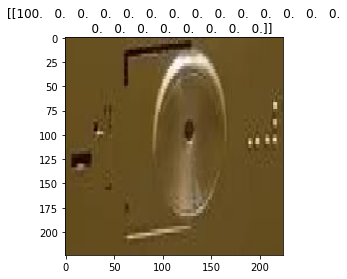

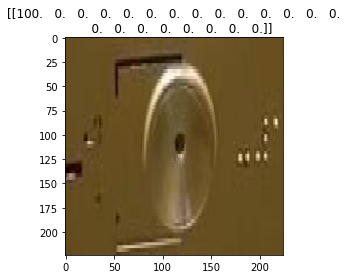

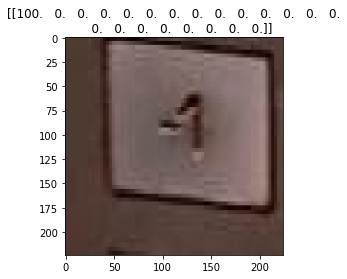

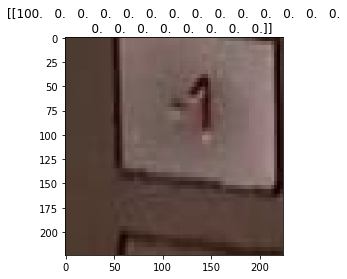

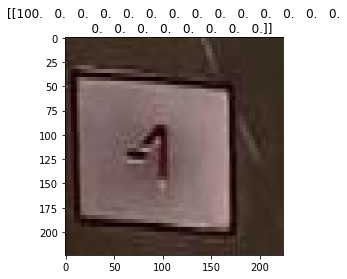

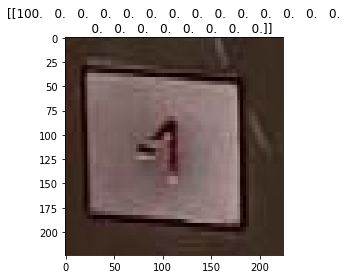

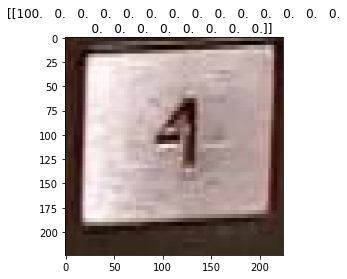

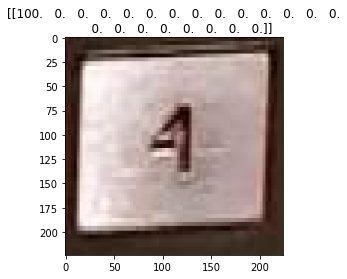

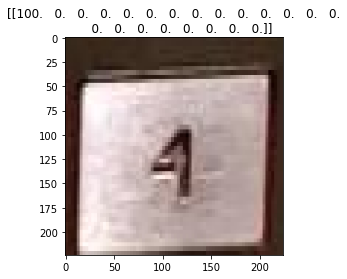

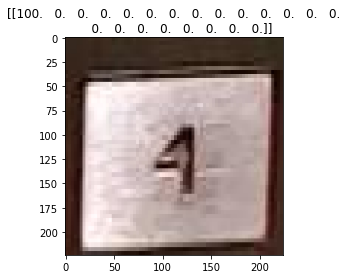

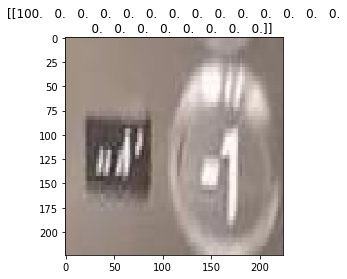

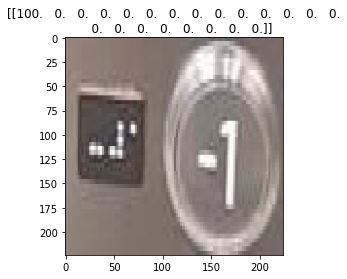

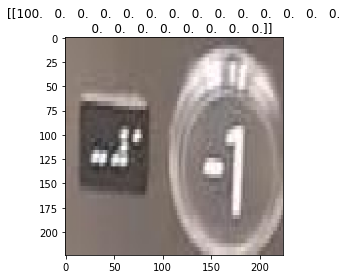

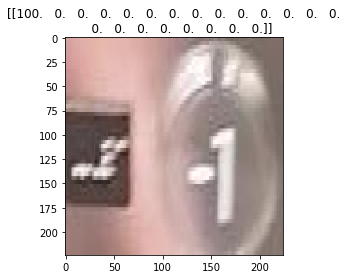

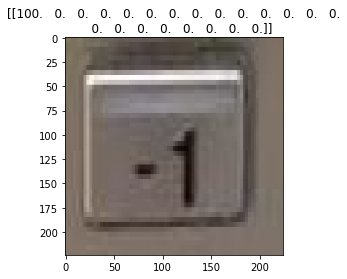

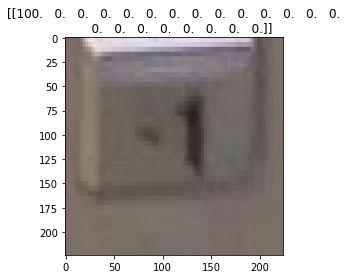

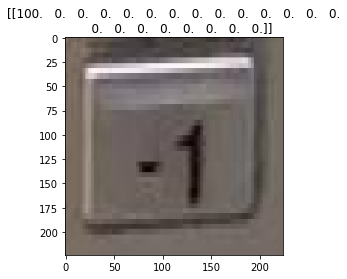

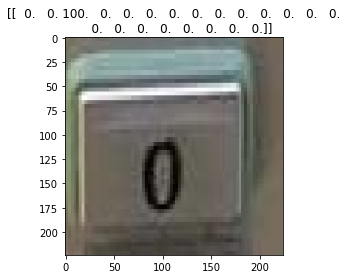

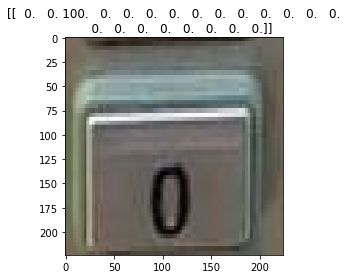

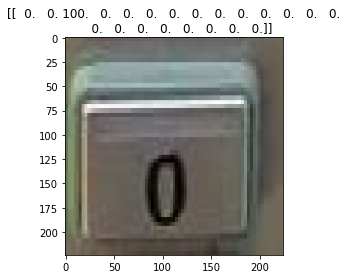

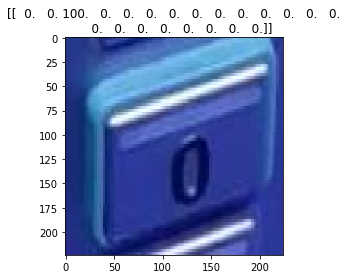

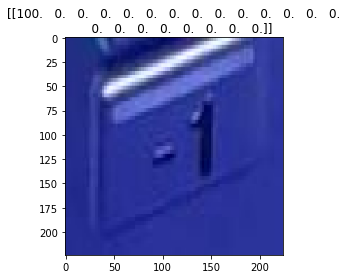

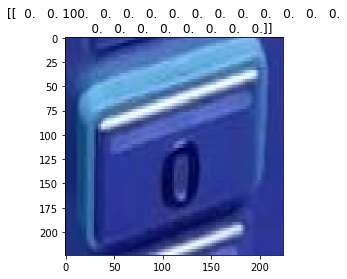

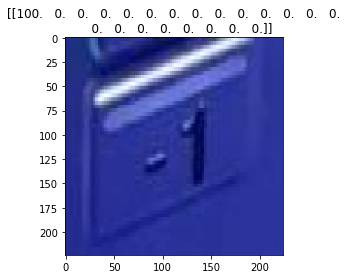

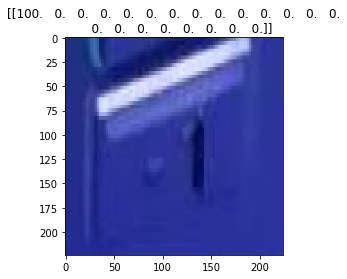

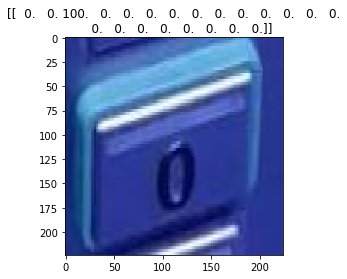

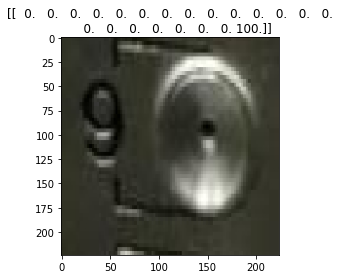

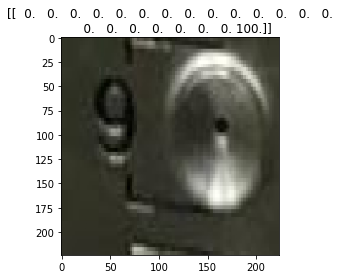

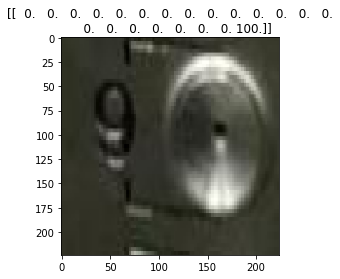

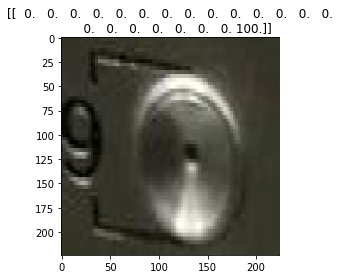

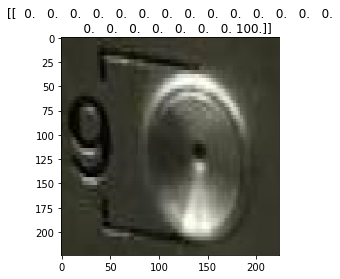

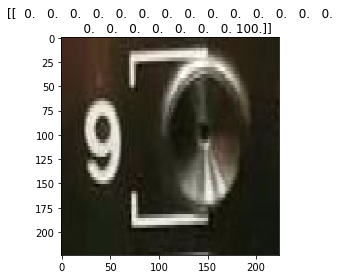

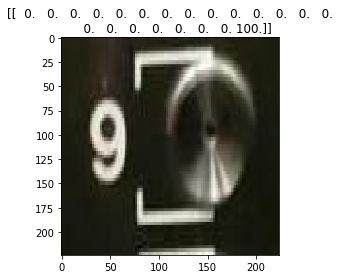

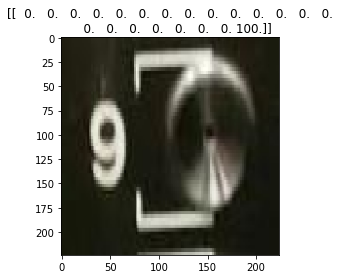

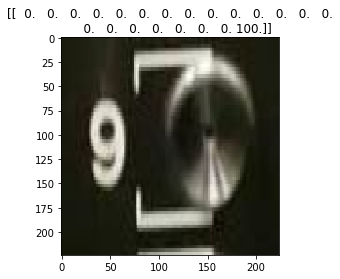

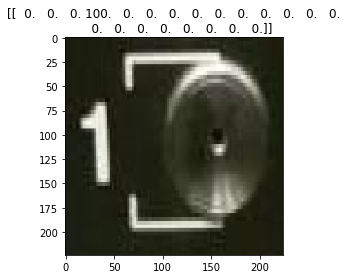

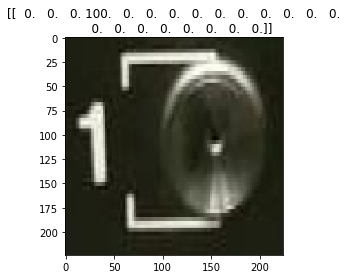

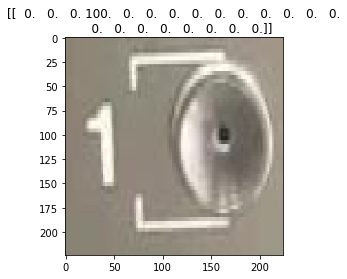

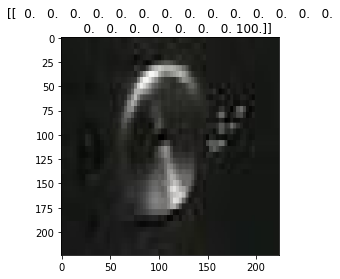

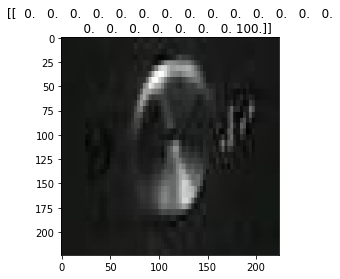

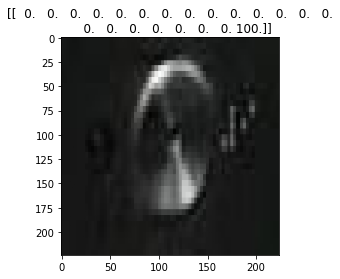

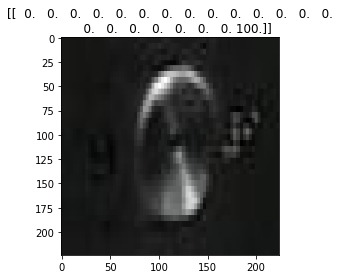

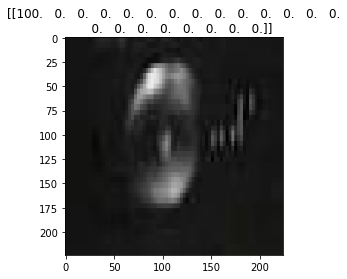

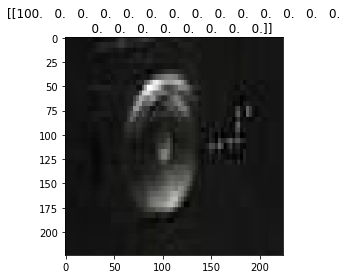

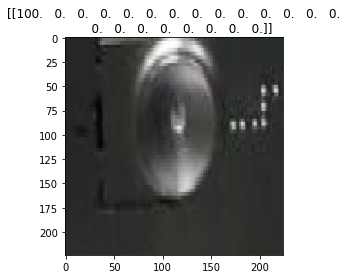

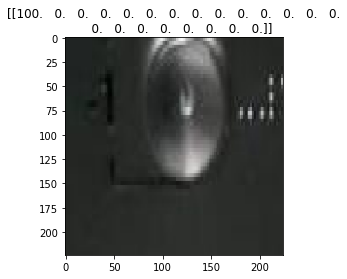

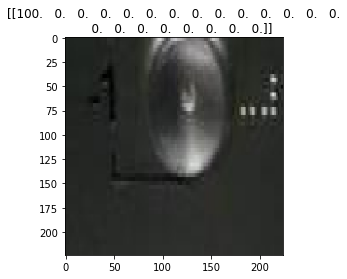

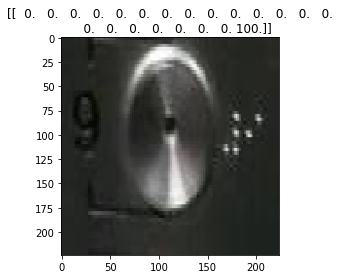

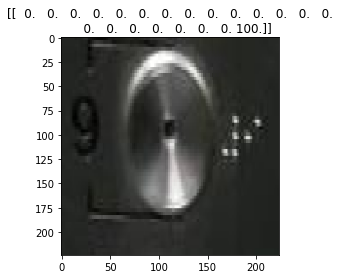

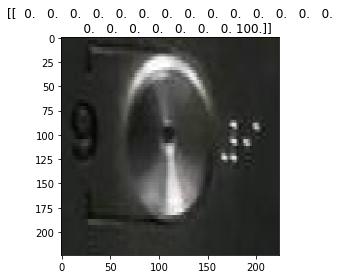

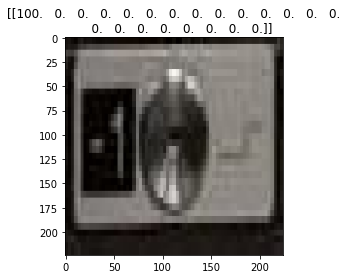

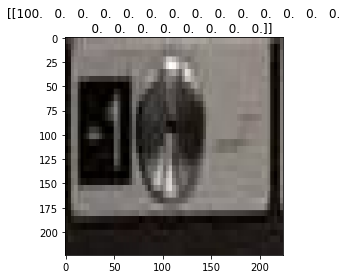

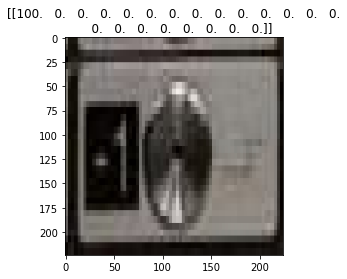

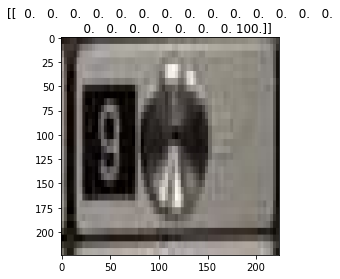

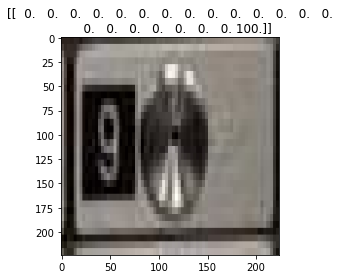

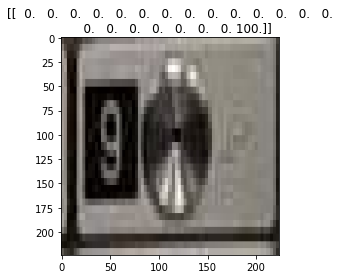

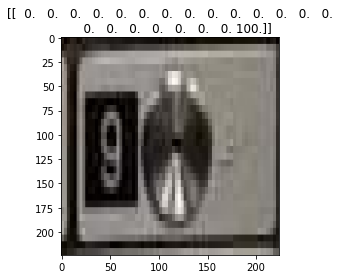

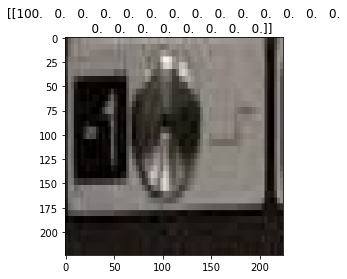

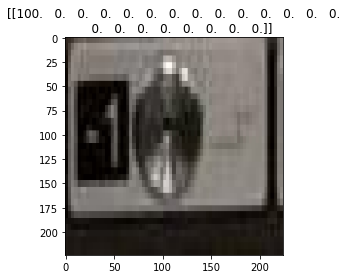

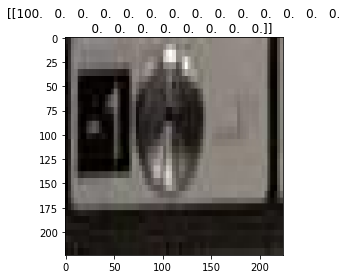

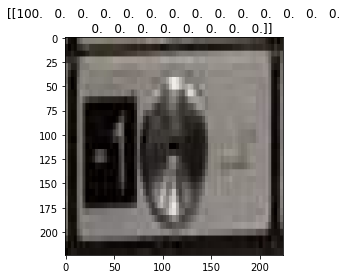

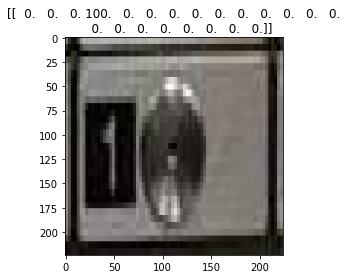

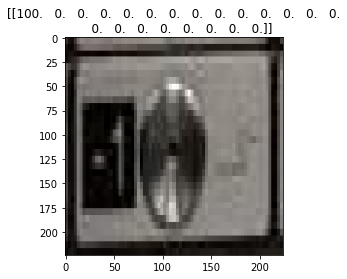

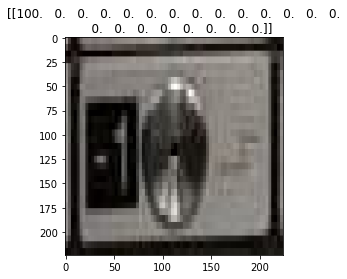

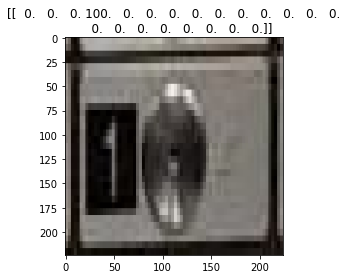

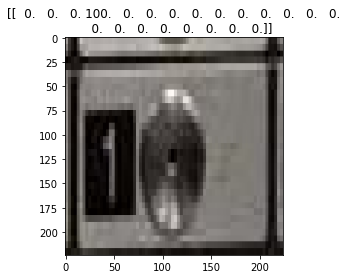

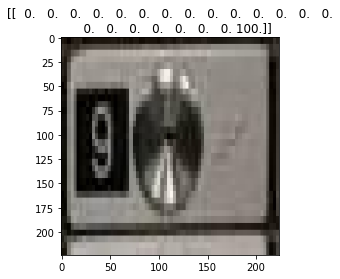

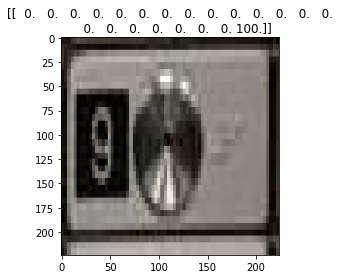

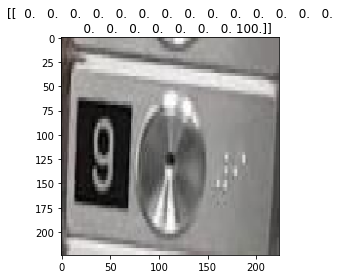

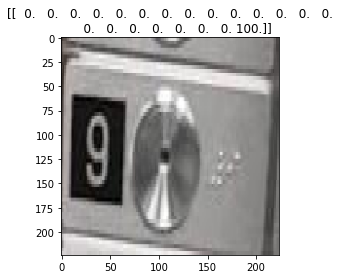

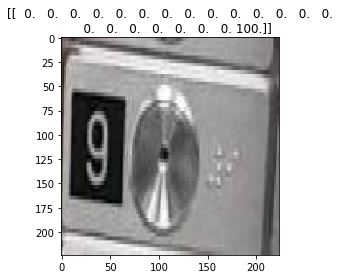

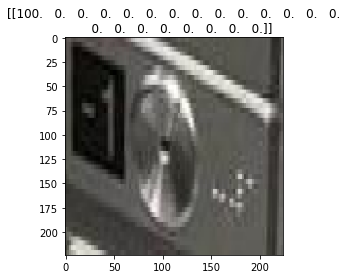

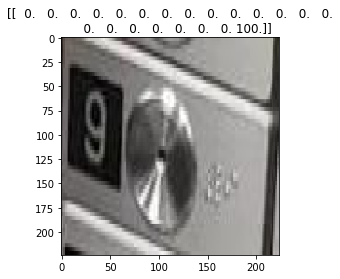

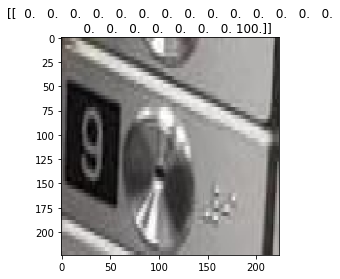

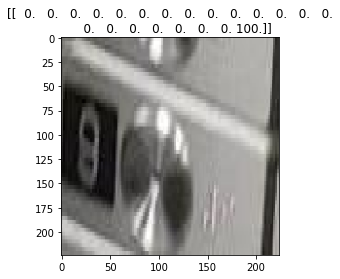

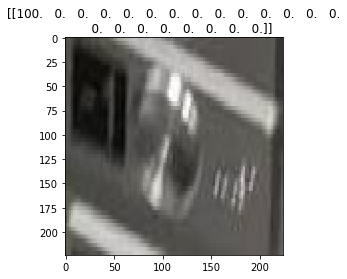

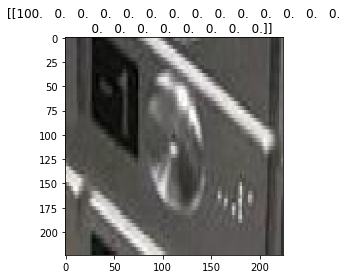

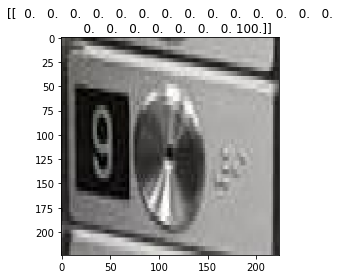

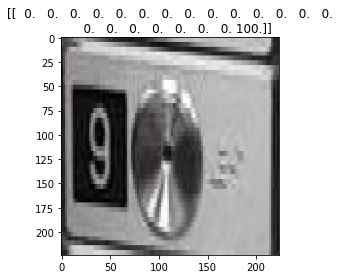

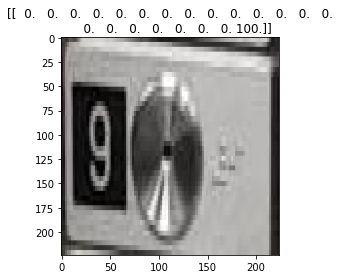

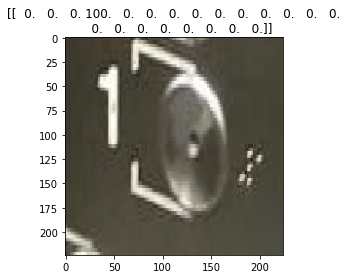

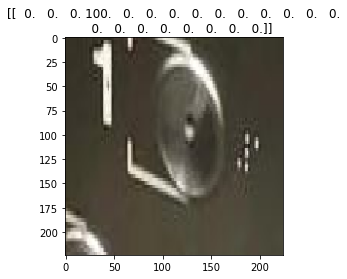

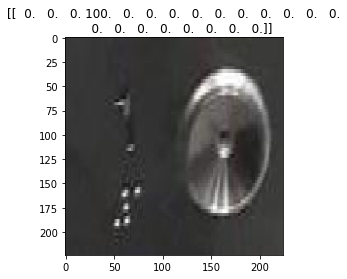

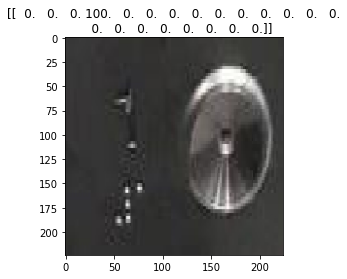

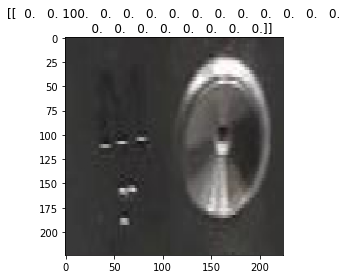

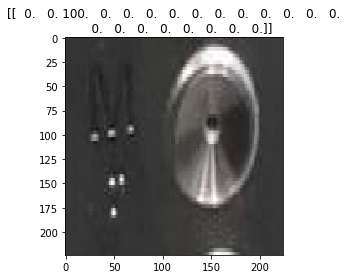

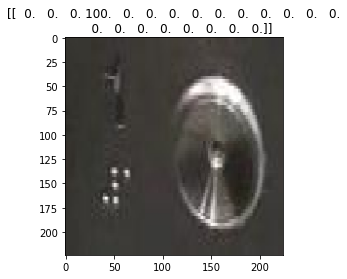

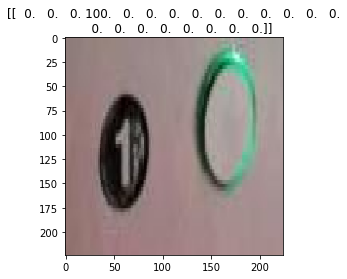

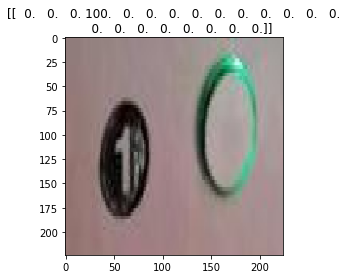

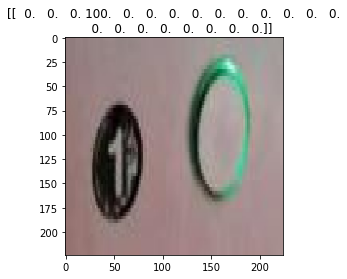

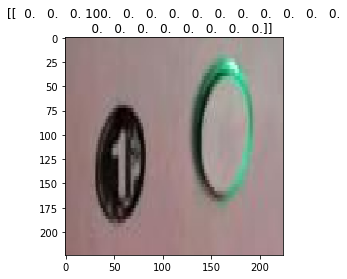

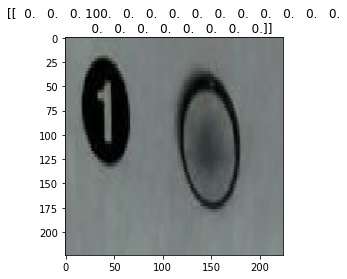

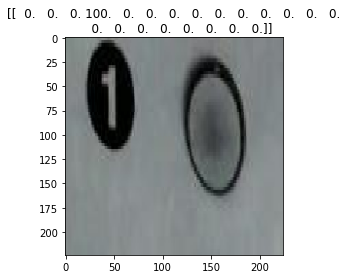

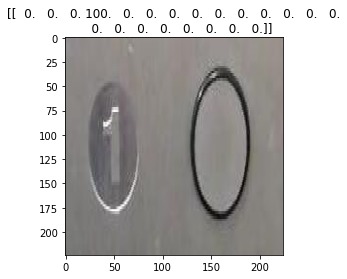

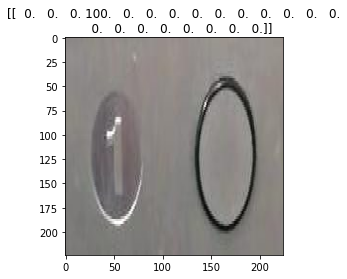

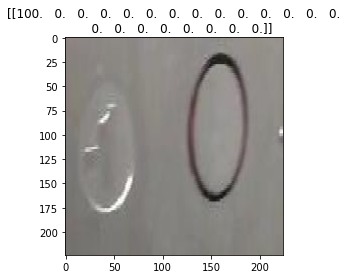

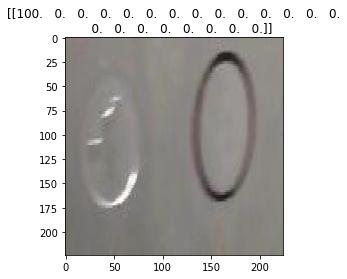

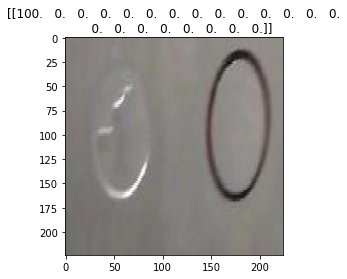

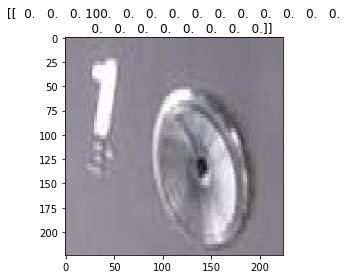

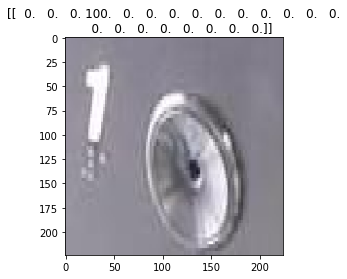

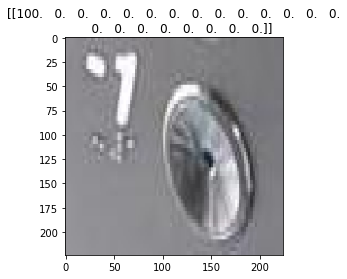

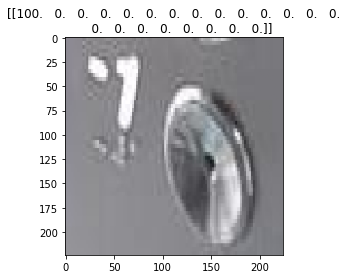

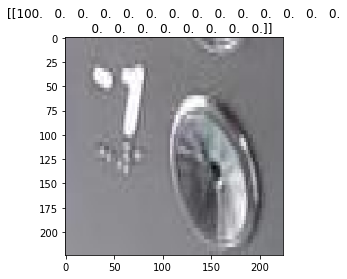

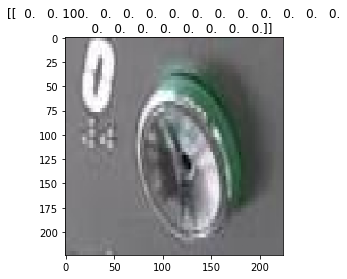

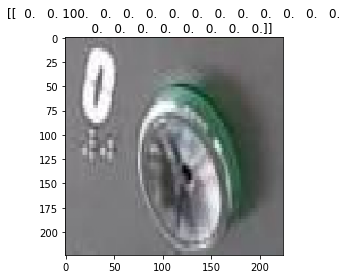

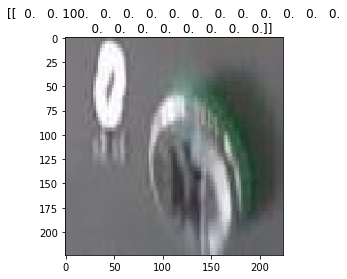

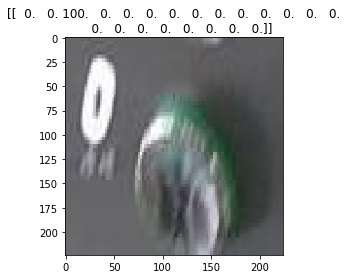

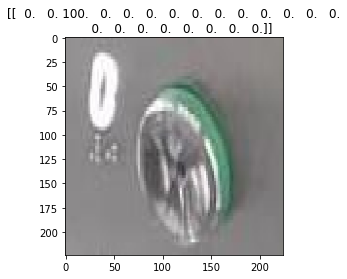

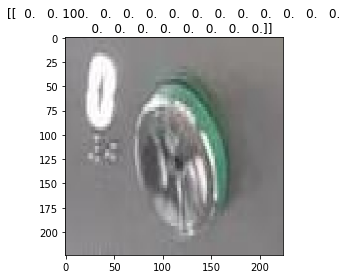

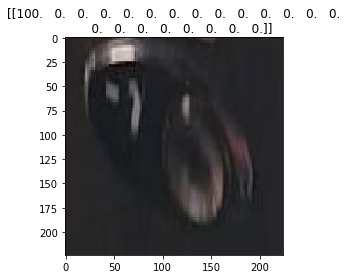

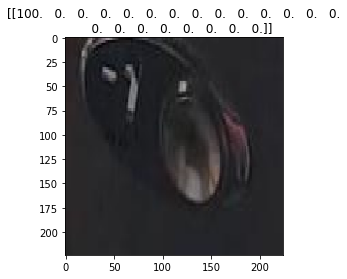

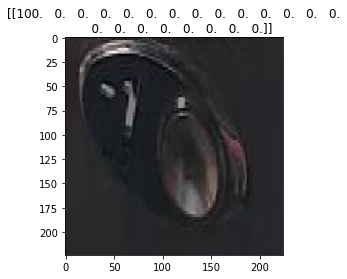

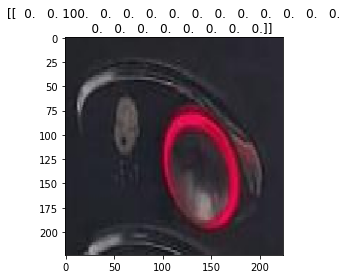

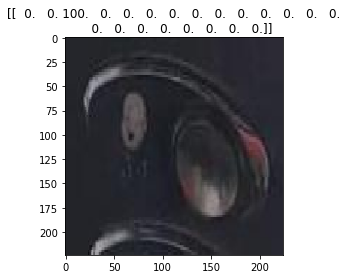

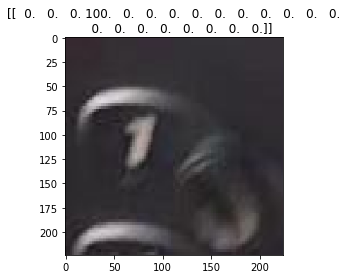

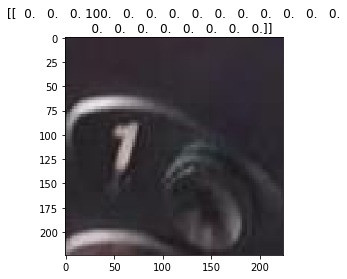

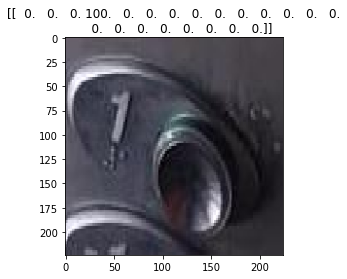

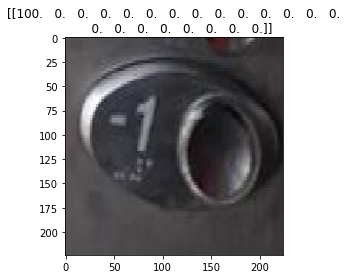

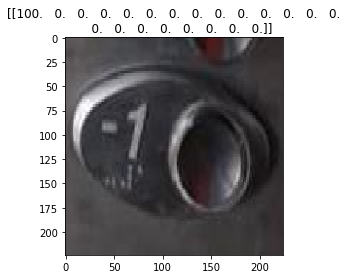

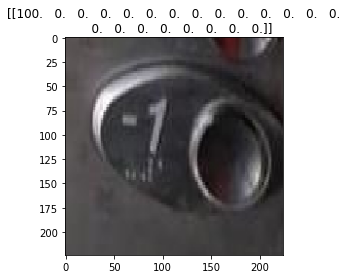

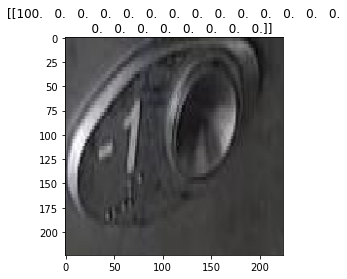

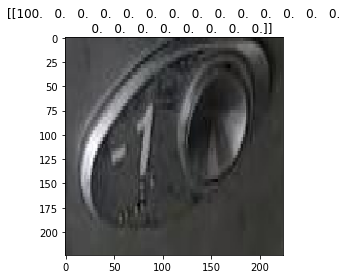

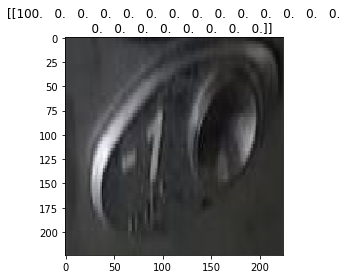

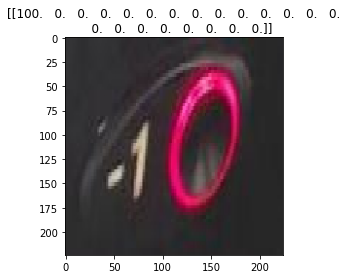

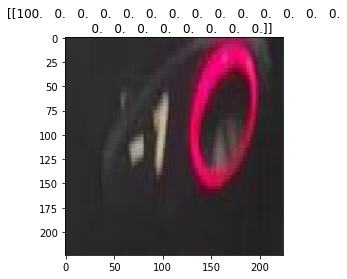

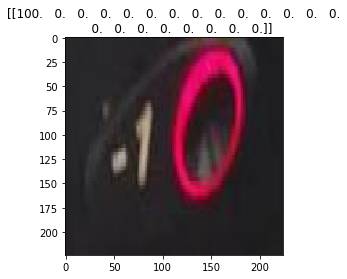

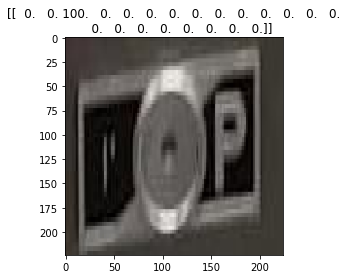

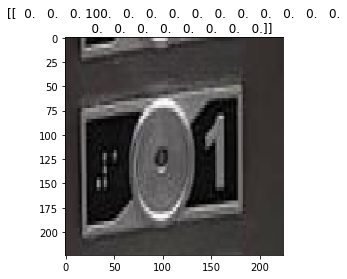

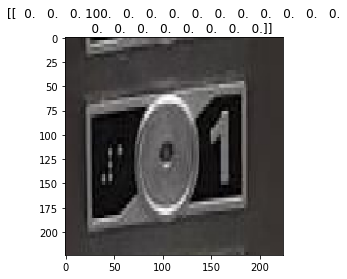

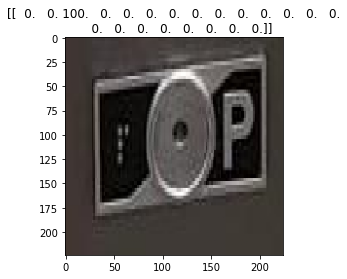

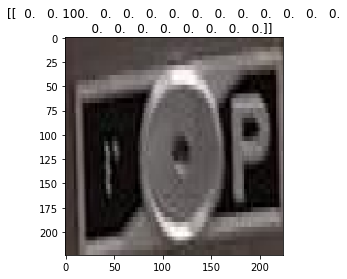

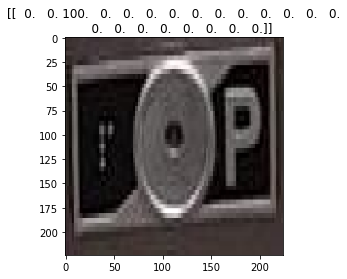

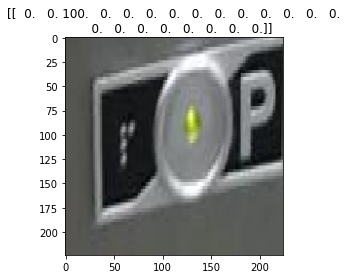

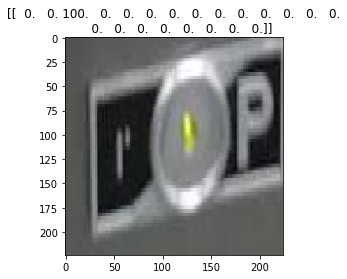

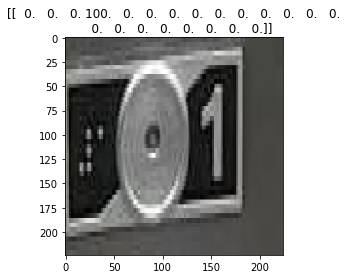

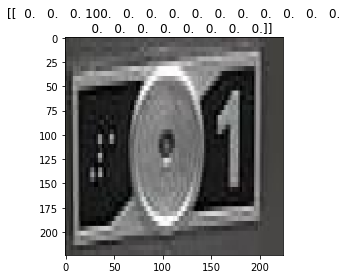

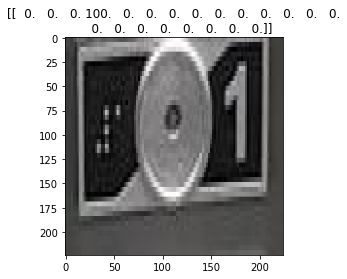

In [13]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
latest = tf.train.latest_checkpoint(MODEL_DIR_PATH)
classifier.model.load_weights(latest)

In [ ]:
for im_arr in images_to_test:
    tf_img_array = tf.expand_dims(im_arr, 0)  # Create batch axis
    predictions = classifier.model.predict(tf_img_array)
    result = predictions.argmax(axis=1)[0]
    rounded_pred = np.around(predictions * 100)
    plt.imshow(im_arr / 255.0)
    plt.title(rounded_pred)
    plt.show()

In [7]:
from src.utils.detection_utils import map_predictions_to_output_label

In [9]:
pred = [1e-3,   3e-2,   2e-3,   0.96,    2e-3]
labels = ['bike', 'dog',  'cat',  'fly',  'house']
pred_sorted, labels_sorted = map_predictions_to_output_label(pred, labels)
